# Lista 03 - ICs + Bootstrap

In [3]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [4]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

Text(0.5, 1.0, 'PDF')

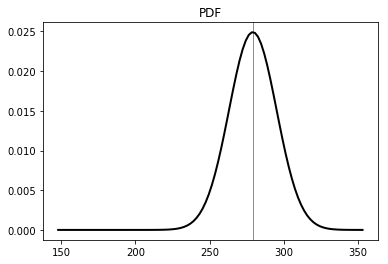

In [5]:
from scipy.stats import norm
dados1 = df['Gestational Days']
x = np.linspace(min(dados1), max(dados1), 100)
plt.plot(x, norm.pdf(x, dados1.mean(), dados1.std()),'k', linewidth=2)
plt.axvline(ymin=0,ymax=1,x=dados1.mean(),c="blue",linewidth=0.5,zorder=0)
plt.title('PDF')

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [6]:
from scipy import stats as ss
from math import sqrt
def calcula_IC_gestacao(df):
    df1 = df['Gestational Days']
    mean = df1.mean()
    std = df1.std()
    std_final = std/sqrt(len(df))

    lower_bound = mean - 1.96*std_final
    upper_bound = mean + 1.96*std_final
    return [lower_bound,upper_bound]

#np.percentile(df['Gestational Days'], 0.95)
calcula_IC_gestacao(df)

[278.18551859376134, 280.01720713025907]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [7]:
def resposta():
    return 3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

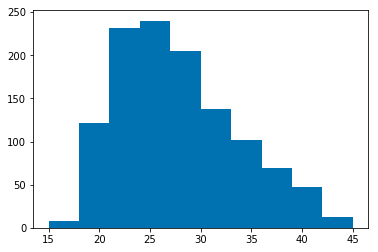

In [8]:
plt.hist(df['Maternal Age'])
plt.show()

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

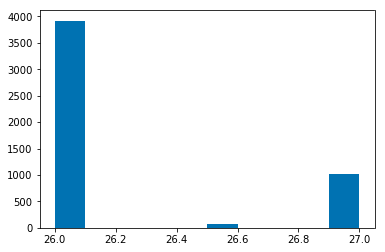

In [53]:
from numpy.random import random

def bootstrap(df, size, n=5000):
    values = np.zeros(n)
    for i in range(n):
        sample = df.sample(size, replace=True)
        values[i] = sample.median()
    return values

medians = bootstrap(df['Maternal Age'], len(df['Maternal Age']))
medians.sort()    
plt.hist(medians)
plt.show()

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [30]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [34]:
def ex3(dados):
    mean = dados.mean()
    median = dados.median()
    var = dados.var()
    std = dados.std()
    return [mean,median,var,std]
    
ex3(dados)

[19.50892087573598, 1.0042548724785347, 3257589.8969675335, 1804.8794688198805]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [37]:
def ex3_IC(dados):
    df1 = dados
    mean = df1.mean()
    std = df1.std()
    std_final = std/sqrt(len(df1))
    lower_bound = mean - 1.96*std_final
    upper_bound = mean + 1.96*std_final
    return [lower_bound,upper_bound]

ex3_IC(dados)

[8.322162029586451, 30.69567972188551]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

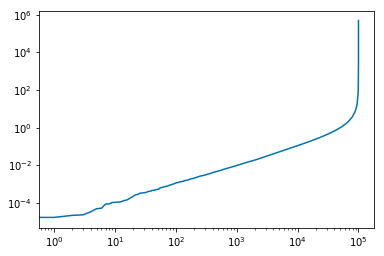

In [40]:
dados = list(dados)
dados.sort()
plt.plot(dados)
plt.xscale('log')
plt.yscale('log')
plt.show()

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

Pois os dados seguem uma distibuição exponencial, o que pode ser visualizado com o gráfico acima, que, em escala log log apresenta comportamento linear em grande parte da distribuição, além de explosão dos dados na parte final da curva